In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score ,root_mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings

In [29]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [30]:
x= data.iloc[: ,:-1]
y =data.iloc[: ,1]
x_train ,x_test ,y_train ,y_test =train_test_split(x,y,train_size=0.8 , random_state=10)



In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)
poly_model = LinearRegression()
poly_model.fit(x_poly_train ,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
y_poly_pred_train = poly_model.predict(x_poly_train)
y_poly_pred_test = poly_model.predict(x_poly_test)


In [33]:
x_range =np.linspace(x.min(),x.max() ,100).reshape(-1 ,1)
x_range_poly = poly.transform(x_range)
y_range_pred = poly_model.predict(x_range_poly)

c:\Users\asus\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


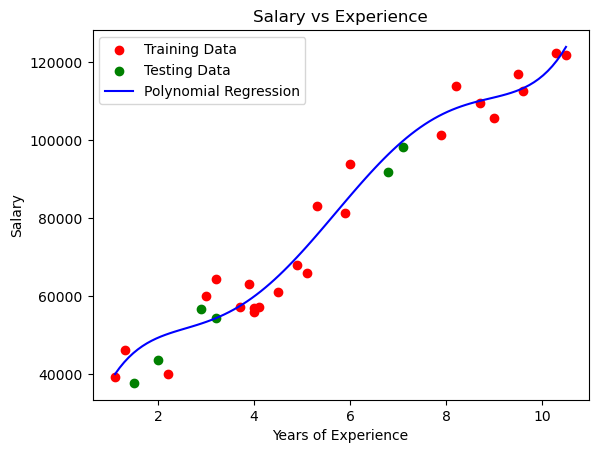

In [34]:
plt.scatter(x_train ,y_train ,color ='red' ,label ="Training Data")
plt.scatter(x_test ,y_test ,color ='green' ,label= "Testing Data")
plt.plot(x_range ,y_range_pred ,color ='blue' ,label ='Polynomial Regression')
plt.title("Salary vs Experience")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [35]:
mse = root_mean_squared_error(y_test , y_poly_pred_test)
print(mse)

4710.108108370394


In [36]:
r2 =r2_score(y_test ,y_poly_pred_test)
print(r2)

0.95838089424994


In [37]:
data = pd.read_csv('Social_Network_Ads.csv')

data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [38]:
x = data.iloc[: ,[2,3]].values

y = data.iloc[: ,4].values

In [39]:
x_train ,x_test ,y_train ,y_test =train_test_split(x,y,train_size=0.8 , random_state=10)


In [40]:

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

0.8875
              precision    recall  f1-score   support

           0       0.91      0.92      0.91        52
           1       0.85      0.82      0.84        28

    accuracy                           0.89        80
   macro avg       0.88      0.87      0.88        80
weighted avg       0.89      0.89      0.89        80



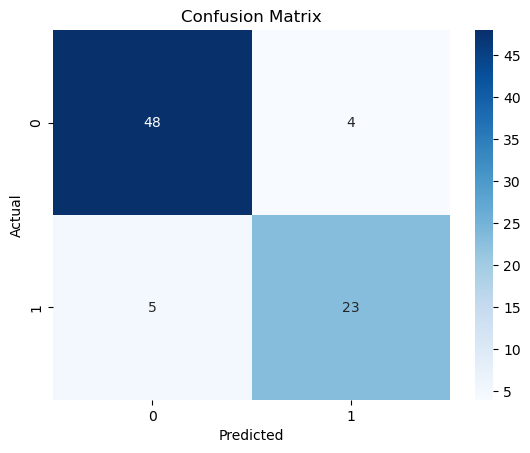

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,classification_report ,confusion_matrix
logistic_model = LogisticRegression()
logistic_model.fit(x_train ,y_train)
y_logistic_pred = logistic_model.predict(x_test)
accuracy = accuracy_score(y_test ,y_logistic_pred)
print(accuracy)
print(classification_report(y_test ,y_logistic_pred))
cm = confusion_matrix(y_test ,y_logistic_pred)
sns.heatmap(cm ,annot =True ,fmt ='d' ,cmap ='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
y_pred = logistic_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[48,  4],
       [ 5, 23]])

In [43]:
tn, fp, fn, tp = cm.ravel()
print("True Negatives:", tn) 
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)


True Negatives: 48
False Positives: 4
False Negatives: 5
True Positives: 23


In [44]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8875


In [45]:
recall_score = recall_score(y_test, y_pred)
print("Recall:", recall_score)

Recall: 0.8214285714285714


C:\Users\asus\AppData\Local\Temp\ipykernel_75988\2381508761.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j,1],


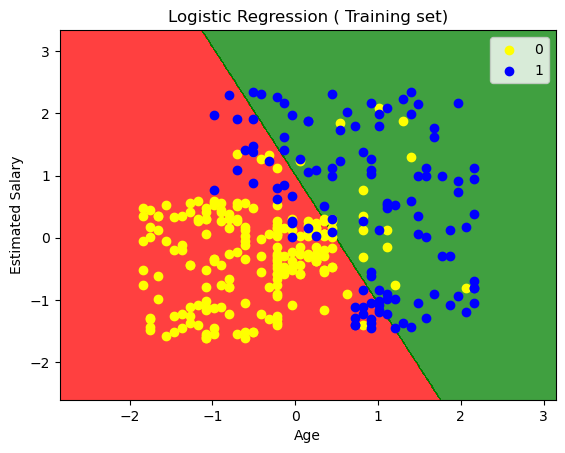

In [52]:
# Visualising the Training set results

from matplotlib.colors import ListedColormap
# use the trained classifier (logistic_model) instead of is_classifier
X_Set, Y_Set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:,0].min() -1, stop = X_Set[:, 0].max() +1, step = 0.01),
                     np.arange(start = X_Set[:,1].min() -1, stop = X_Set[:, 1].max() +1, step = 0.01))
 
 
plt.contourf(X1, X2, logistic_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j,1],
                c = ListedColormap(('yellow', 'blue'))(i), label = j)
plt.title('Logistic Regression ( Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()